# Desafio 1
## Detector de lixo em ruas

Treine um modelo utilizando transferência de aprendizado do modelo Yolo V8 (Nano) capaz de detectar sacos de lixo e caixas de papelão para ser utilizado em um detector em tempo real que visa informar aos serviços públicos a qualidade do serviço de coleta.

Utilize o dataset preparado para o treinamento de modelos do padrão Yolo neste [repositório](https://github.com/michelpf/dataset-pothole).

Se quiser saber mais sobre o dataset, consulte os dados originais no [Kaggle](https://www.kaggle.com/datasets/vencerlanz09/plastic-paper-garbage-bag-synthetic-images).

## Critério de sucesso

mAP50 > 90%
mAP50-95 > 80%

Realize a detecção de imagens de exemplo para verificar a robustez do modelo com imagens diferentes de teste e treinamento.

## 1. Requerimentos

### 1.1 Bibliotecas

Todas as bibliotecas já estão instaladas no Google Colab, com a exceção do Ultralytics.

* OpenCV >= 4.2.0
* Numpy >= 1.18.1
* Matplotlib > =3.1.3
* Ultralytics >= 8.0.0

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 43.6 MB/s eta 0:00:00


### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!git clone https://github.com/michelpf/dataset-disposable-bag

Importação das bibliotecas necessárias.

In [ ]:
from ultralytics import YOLO
import ultralytics

import os
import cv2
import matplotlib.pyplot as plt

Verificando se a biblioteca detectou GPUs. Caso não tenha detectado certifique que você alterou o processamento do Colab para GPU (```Ambiente de Execução``` > ```Alterar o tipo de ambiente de execução```)

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


Baixar os pesos e arquitetura do modelo Yolo V8 Nano

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 13.5MB/s]


Realizando a configuração das imagens e classes utilizada no treinamento.

In [ ]:
!touch configs_modelo_trashbag.yaml

In [ ]:
%%writefile configs_modelo_trashbag.yaml
path: '/content/dataset-disposable-bag/dataset'
train: 'train/'
val: 'test/'

nc: 3
names: ["garbage", "paper", "plastic"]

Overwriting configs_modelo_trashbag.yaml


In [ ]:
arquivo_config  = "configs_modelo_trashbag.yaml"

In [ ]:
resultados = model.train(data=arquivo_config, epochs=10, imgsz=720, name='yolov8_disposable_bag')

100%|██████████| 6.23M/6.23M [00:00<00:00, 73.0MB/s]
Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=configs_modelo_trashbag.yaml, epochs=10, patience=50, batch=16, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_disposable_bag, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=T

Realizando testes de detecção com imagens fora do conjunto de dados de treinamento.
Para tanto precisamos baixar as imagens de exemplo do repositório abaixo.

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Carregando o melhor modelo treinado. Ele fica na pasta ```runs/detect/yolov8_disposable_bag/weights/```.

In [ ]:
model = YOLO('best-3.pt')


image 1/1 /content/lixo-1.jpg: 512x736 3 garbages, 54.2ms
Speed: 12.2ms preprocess, 54.2ms inference, 35.5ms postprocess per image at shape (1, 3, 736, 736)


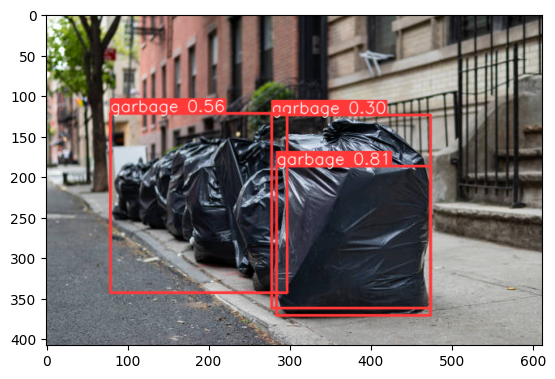

In [ ]:
results = model.predict(source='fiap-ml-visao-computacional/aula-5-machine-learning-aplicado/desafio-1/imagens/lixo-1.jpg', conf=0.25)

image_result = results[0].plot()
image_result = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

plt.imshow(image_result)


image 1/1 /content/lixo-2.jpeg: 576x736 4 garbages, 1 paper, 2 plastics, 237.4ms
Speed: 32.3ms preprocess, 237.4ms inference, 7.8ms postprocess per image at shape (1, 3, 736, 736)


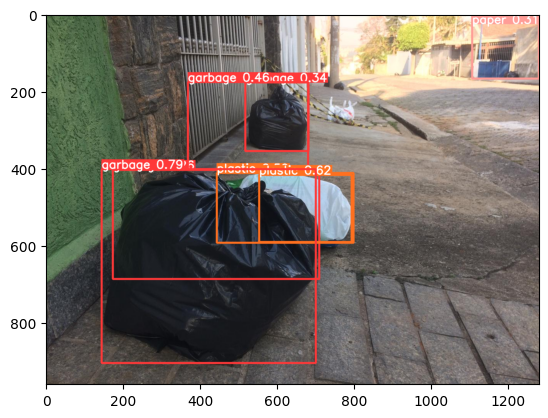

In [ ]:
results = model.predict(source='fiap-ml-visao-computacional/aula-5-machine-learning-aplicado/desafio-1/imagens/lixo-2.jpeg', conf=0.25)

image_result = results[0].plot()
image_result = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

plt.imshow(image_result)


image 1/1 /content/lixo-3.jpg: 512x736 10 garbages, 1 paper, 7.2ms
Speed: 5.1ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 736)


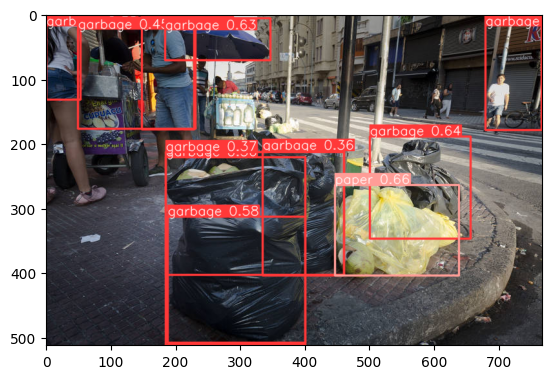

In [ ]:
results = model.predict(source='fiap-ml-visao-computacional/aula-5-machine-learning-aplicado/desafio-1/imagens/lixo-3.jpg', conf=0.3)

image_result = results[0].plot()
image_result = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

plt.imshow(image_result)